<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


ImportError: No module named 'seaborn'

In [5]:
#data = pd.read_csv('../../data/adult.data.csv')
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
len(data)

32561

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [9]:
data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [12]:
data[data.sex == 'Female'].age.mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [94]:
data['native-country'].value_counts(normalize = True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

In [ ]:
#Кореляции цветные и цифры
corr = data[features_worst].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [92]:
#data['education'].plot(kind = 'hist')

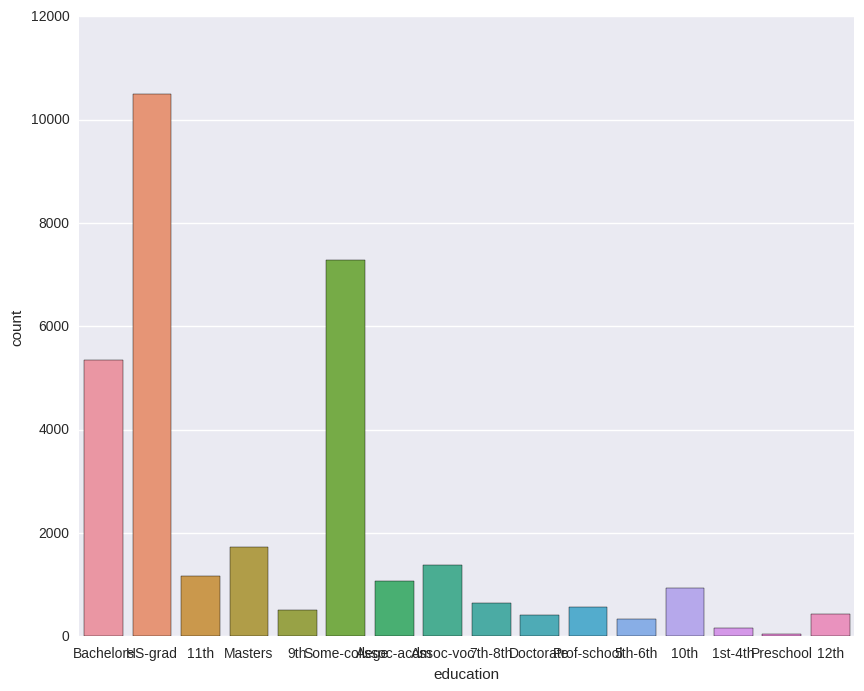

In [86]:
sns.countplot(data['education'],label="Count")

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [34]:
data[data['salary'] == '>50K'].age.mean(),data[data['salary'] == '>50K'].age.std(),data[data['salary'] == '<=50K'].age.mean(),data[data['salary'] == '<=50K'].age.std()

(44.24984058155847, 10.51902771985177, 36.78373786407767, 14.020088490824813)

**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [37]:
data[data['salary'] == '>50K'].education.unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th', '10th',
       '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [41]:
data.groupby(['race']).age.describe()

race                     
Amer-Indian-Eskimo  count      311.000000
                    mean        37.173633
                    std         12.447130
                    min         17.000000
                    25%         28.000000
                    50%         35.000000
                    75%         45.500000
                    max         82.000000
Asian-Pac-Islander  count     1039.000000
                    mean        37.746872
                    std         12.825133
                    min         17.000000
                    25%         28.000000
                    50%         36.000000
                    75%         45.000000
                    max         90.000000
Black               count     3124.000000
                    mean        37.767926
                    std         12.759290
                    min         17.000000
                    25%         28.000000
                    50%         36.000000
                    75%         46.000000
        

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married*, остальных считаем холостыми.**

In [43]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

In [61]:
d = ((4443 - 3980) + (10683 - 10192) + (1025-959) + (993 - 908))/(443 + 10683 +1025 +993)
m = ((23-13) + (14976-8284) + (418 - 384))/(23 + 14976+418)
d,m

(0.08406877662811929, 0.43692028280469614)

In [59]:
data.groupby(['marital-status']).salary.describe()

marital-status               
Divorced               count      4443
                       unique        2
                       top       <=50K
                       freq       3980
Married-AF-spouse      count        23
                       unique        2
                       top       <=50K
                       freq         13
Married-civ-spouse     count     14976
                       unique        2
                       top       <=50K
                       freq       8284
Married-spouse-absent  count       418
                       unique        2
                       top       <=50K
                       freq        384
Never-married          count     10683
                       unique        2
                       top       <=50K
                       freq      10192
Separated              count      1025
                       unique        2
                       top       <=50K
                       freq        959
Widowed                count      

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [62]:
data['hours-per-week'].max()

99

In [63]:
len(data[data['hours-per-week']==99])

85

In [64]:
data[data['hours-per-week']==99].salary.describe()

count        85
unique        2
top       <=50K
freq         60
Name: salary, dtype: object

In [65]:
(85-60)/85

0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих много и мало (*salary*) для каждой страны (*native-country*).**

In [68]:
data[data['salary']==">50K"].groupby(['native-country'])['hours-per-week'].mean()

native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500000
Ireland               48.000000
Italy                 45.400000
Jamaica               41.100000
Japan                 47.958333
Laos                  40.000000
Mexico                46.575758
Nicaragua             37.500000
Peru                  40.000000
Philippines           43.032787
Poland                39.000000
Portugal              41.

In [69]:
data[data['salary']=="<=50K"].groupby(['native-country'])['hours-per-week'].mean()

native-country
?                             40.164760
Cambodia                      41.416667
Canada                        37.914634
China                         37.381818
Columbia                      38.684211
Cuba                          37.985714
Dominican-Republic            42.338235
Ecuador                       38.041667
El-Salvador                   36.030928
England                       40.483333
France                        41.058824
Germany                       39.139785
Greece                        41.809524
Guatemala                     39.360656
Haiti                         36.325000
Holand-Netherlands            40.000000
Honduras                      34.333333
Hong                          39.142857
Hungary                       31.300000
India                         38.233333
Iran                          41.440000
Ireland                       40.947368
Italy                         39.625000
Jamaica                       38.239437
Japan                    